# 1. Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# 2.Data Collection and information about Data

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [4]:
df.shape

(1340, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
# the columns which are containing missing values
df.isna().sum()

Id               0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [8]:
# So, we can see that the number of missing samples is too less... so we just can drop them
df.dropna(inplace=True)
df.shape # so, earlier we had 1340 rows but after dropping 8 rowsit becomes 1332

(1332, 10)

In [9]:
# To see  statistics of numerical columns
df.describe()

,Id,age,bmi,bloodpressure,children,claim
count,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000
mean,674.474474,38.086336,30.658333,94.189189,1.099850,13325.246426
std,384.703785,11.112804,6.118967,11.445173,1.205958,12109.620712
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,341.750000,29.000000,26.200000,86.000000,0.000000,4760.157500
50%,674.500000,38.000000,30.350000,92.000000,1.000000,9412.965000
75%,1007.250000,47.000000,34.725000,99.000000,2.000000,16781.327500
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [10]:
# if we also want to include categorical columns 
df.describe(include='all')

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1332.000000,1332.000000,1332,1332.000000,1332.000000,1332,1332.000000,1332,1332,1332.000000
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,670,NaN,NaN,695,NaN,1058,442,NaN
mean,674.474474,38.086336,NaN,30.658333,94.189189,NaN,1.099850,NaN,NaN,13325.246426
std,384.703785,11.112804,NaN,6.118967,11.445173,NaN,1.205958,NaN,NaN,12109.620712
min,1.000000,18.000000,NaN,16.000000,80.000000,NaN,0.000000,NaN,NaN,1121.870000
25%,341.750000,29.000000,NaN,26.200000,86.000000,NaN,0.000000,NaN,NaN,4760.157500
50%,674.500000,38.000000,NaN,30.350000,92.000000,NaN,1.000000,NaN,NaN,9412.965000
75%,1007.250000,47.000000,NaN,34.725000,99.000000,NaN,2.000000,NaN,NaN,16781.327500


In [11]:
# distribution of columns
num_cols=["age","bmi","bloodpressure","children","claim"]

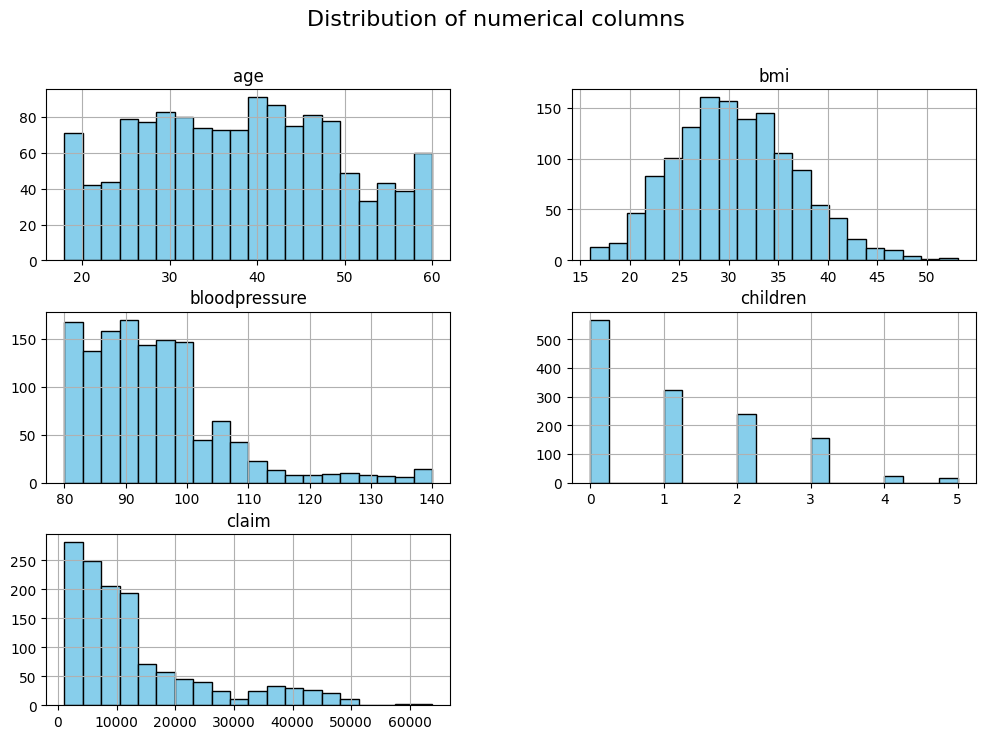

In [12]:
df[num_cols].hist(bins=20,figsize=(12,8),color="skyblue",edgecolor="black")
plt.suptitle("Distribution of numerical columns", fontsize=16)
plt.show()

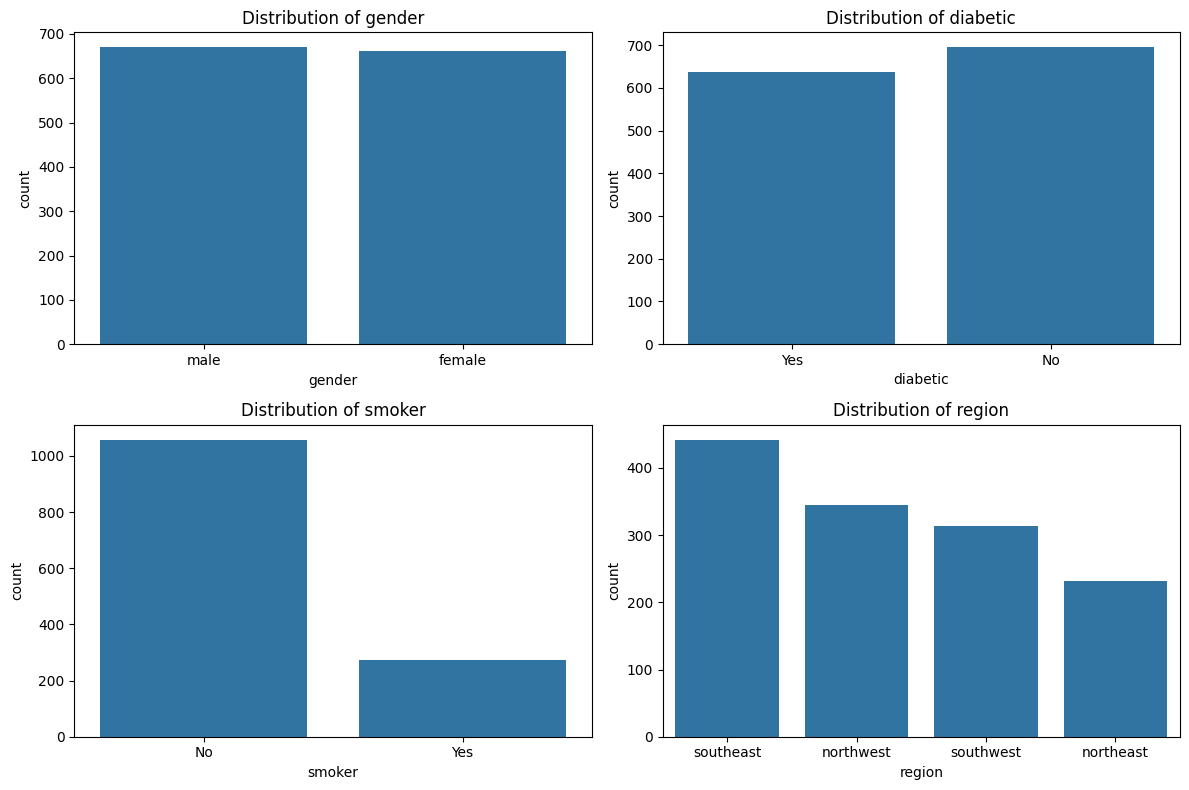

In [13]:
# Now, we will se categorical distribution
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ["gender", "diabetic", "smoker", "region"]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


In [14]:
# Now, we want saws claim with respect to gender and smoker
df.groupby(["gender","smoker"])["claim"].mean().round(2)

gender  smoker
female  No         8762.30
        Yes       30679.00
male    No         8169.25
        Yes       33042.01
Name: claim, dtype: float64

In [15]:
# So, claim of smoker are higher no matter whether they are male or female 

Text(0.5, 1.0, 'Average insurance claim by gender and smoker')

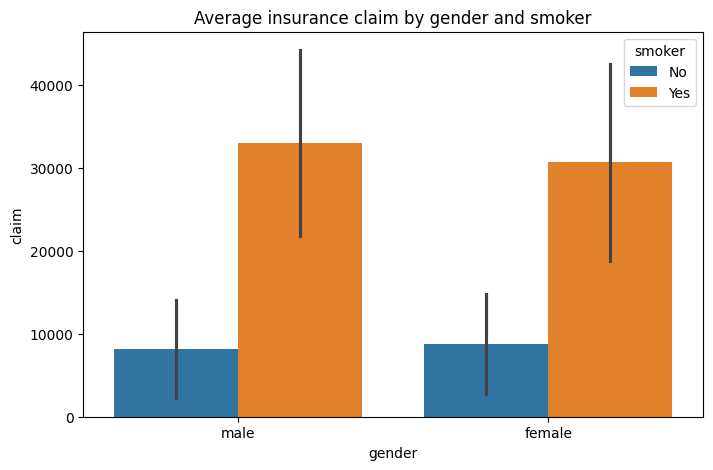

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='gender',y='claim',hue='smoker',estimator='mean',errorbar='sd')
plt.title("Average insurance claim by gender and smoker")

In [17]:
# now, we want to show w.r.t region and diabetic...
pivot_region_diabetic=df.groupby(["region","diabetic"])["claim"].mean().unstack()

In [18]:
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.861455,16818.302231
northwest,11442.831842,12224.958000
southeast,13578.717200,12574.093226
southwest,13069.907824,12313.739167


Text(0.5, 1.0, 'average claim by region and diabetic')

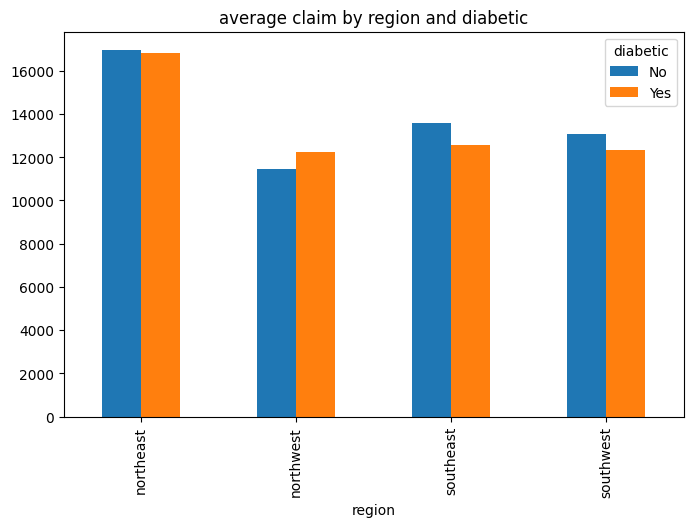

In [19]:
pivot_region_diabetic.plot(kind='bar',figsize=(8,5))
plt.title("average claim by region and diabetic")

In [20]:
# Now, we are going to see effect of claim w.r.t smoker and region 
pivot_table=pd.pivot_table(df,values="claim",index="region",columns="smoker")
pivot_table

smoker,No,Yes
region,,
northeast,11666.112195,29673.536269
northwest,8076.203415,30192.002759
southeast,7444.144872,34844.997253
southwest,8294.754102,32269.064138


Text(0.5, 1.0, 'average claim by region and smoker')

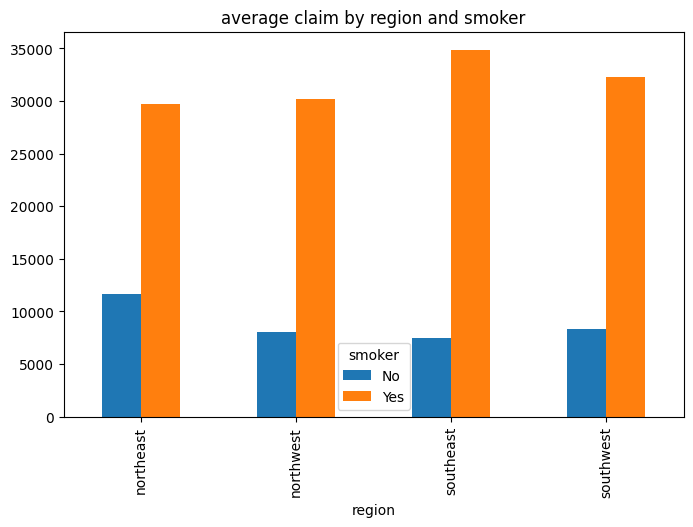

In [21]:
pivot_table.plot(kind='bar',figsize=(8,5))
plt.title("average claim by region and smoker")

In [22]:
pivot_table=pd.pivot_table(df,values="claim",index="children",columns="diabetic")
pivot_table

diabetic,No,Yes
children,,
0,12967.395398,11985.289857
1,12730.455810,12732.055724
2,15567.767583,14579.360417
3,13807.612892,17091.258649
4,14106.630000,13573.352500
5,8519.043636,9205.594286


In [23]:
# Now, we will do correaltion heatmap
num_cols

['age', 'bmi', 'bloodpressure', 'children', 'claim']

In [24]:
corr = df[num_cols].corr()


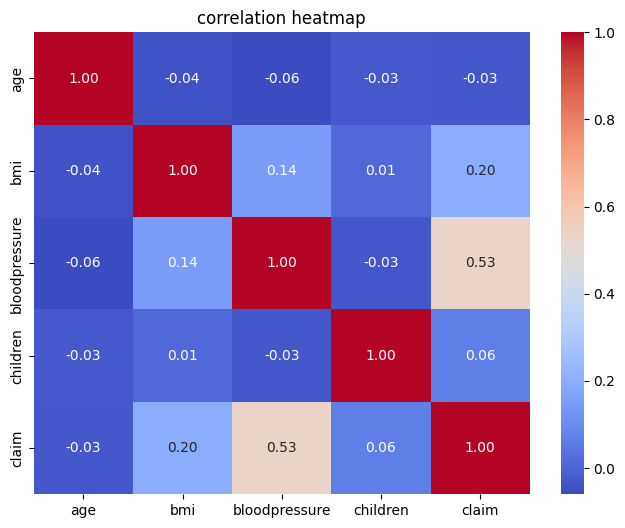

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("correlation heatmap")
plt.show()

In [26]:
# so we can say that only bloddpressure is corelated to claim nothing else

Text(0.5, 1.0, ' claim vs age by smoker and gender')

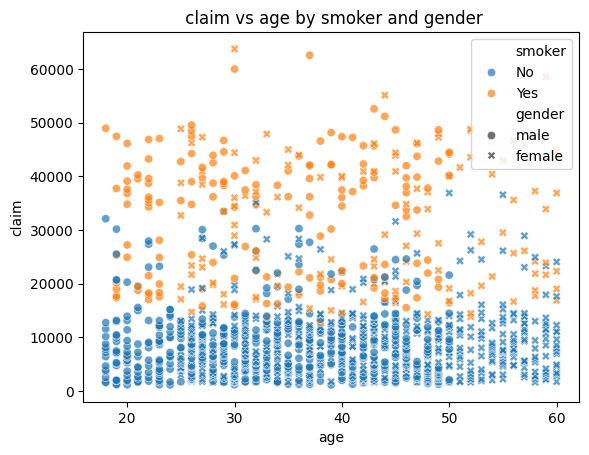

In [27]:
sns.scatterplot(data=df,x="age",y="claim",hue="smoker",style="gender",alpha=0.7)
plt.title(" claim vs age by smoker and gender")

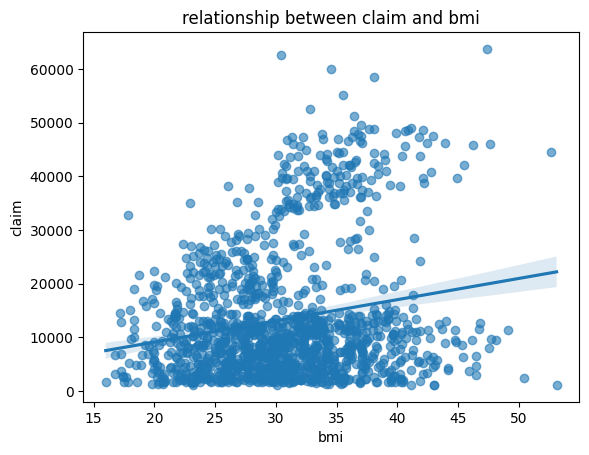

In [28]:
sns.regplot(data=df,x="bmi",y="claim",scatter_kws={"alpha":0.6})
plt.title("relationship between claim and bmi")
plt.show()

In [29]:
# kind of linear relationship

In [30]:
df["age_group"]=pd.cut(df["age"],bins=[0,18,30,45,60,100],labels=["<18","18-30","30-45","45-60","60+"])

In [31]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,30-45
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,18-30
7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80,18-30
8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40,18-30
9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46,18-30
...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,30-45
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,45-60
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,18-30
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,30-45


In [32]:
df['age_group'].value_counts()

age_group
30-45    553
45-60    383
18-30    380
<18       16
60+        0
Name: count, dtype: int64

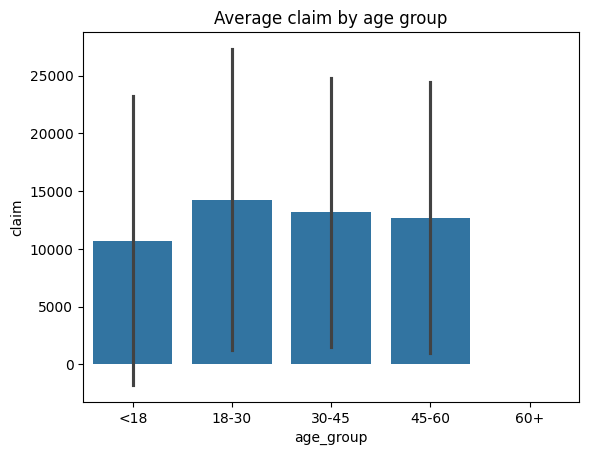

In [33]:
# lets do barplot with this new column
sns.barplot(data=df,x="age_group",y="claim",estimator="mean",errorbar="sd")
plt.title("Average claim by age group")
plt.show()

In [34]:
# Now we will create group of bmi
df["bmi_group"]=pd.cut(df["bmi"],bins=[0,18.5,24.9,29.9,100],labels=["underweight","normal","overweight","obese"])

In [35]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group,bmi_group
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,30-45,normal
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,18-30,obese
7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80,18-30,obese
8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40,18-30,obese
9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46,18-30,obese
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,30-45,obese
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,45-60,obese
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,18-30,obese
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,30-45,obese


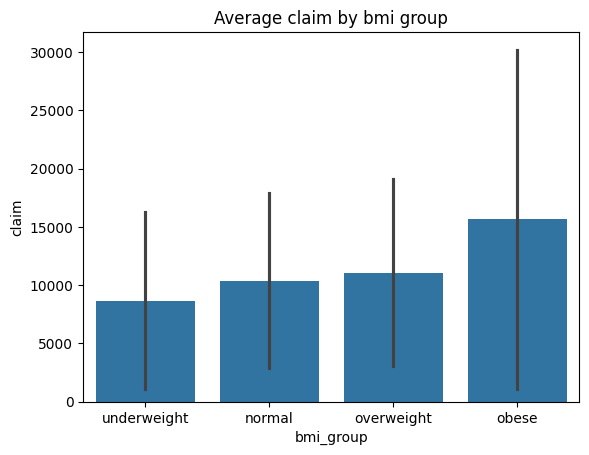

In [36]:
sns.barplot(data=df,x="bmi_group",y="claim",estimator="mean",errorbar="sd")
plt.title("Average claim by bmi group")
plt.show()

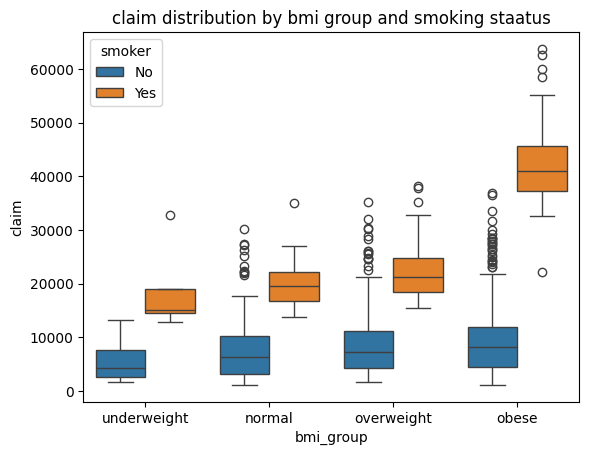

In [37]:
sns.boxplot(data=df,x="bmi_group",y="claim",hue="smoker")
plt.title("claim distribution by bmi group and smoking staatus")
plt.show()

In [38]:
# which is obvious ... why we make bmi gropu and age group .... because if we take each value of the age and bmi then the scatter plot becomes very
# chaotic... thatswhy we are grouping them 

In [39]:
# Till now we swa that bloodpressure is more important from correaltion heatmap... and now we see that bmi ,smoker are also dependent... and also we 
# combined them to see the result 


# 3. Data Preprocessing

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib


In [41]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group,bmi_group
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,30-45,normal
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,18-30,obese
7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80,18-30,obese
8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40,18-30,obese
9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46,18-30,obese
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,30-45,obese
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,45-60,obese
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,18-30,obese
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,30-45,obese


In [42]:
df.columns

Index(['Id', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim', 'age_group', 'bmi_group'],
      dtype='object')

In [44]:
X=df[["age","gender","bmi","bloodpressure","diabetic","children","smoker"]] # we are not taking region 
y=df["claim"]

In [45]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.0,male,23.2,91,Yes,0,No
1,24.0,male,30.1,87,No,0,No
7,19.0,male,41.1,100,No,0,No
8,20.0,male,43.0,86,No,0,No
9,30.0,male,53.1,97,No,0,No
...,...,...,...,...,...,...,...
1335,44.0,female,35.5,88,Yes,0,Yes
1336,59.0,female,38.1,120,No,1,Yes
1337,30.0,male,34.5,91,Yes,3,Yes
1338,37.0,male,30.4,106,No,0,Yes


In [46]:
y

0        1121.87
1        1131.51
7        1146.80
8        1149.40
9        1163.46
          ...   
1335    55135.40
1336    58571.07
1337    60021.40
1338    62592.87
1339    63770.43
Name: claim, Length: 1332, dtype: float64

In [49]:
cat_cols = ["gender", "diabetic", "smoker"]

label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col])
    label_encoders[col] = le

    joblib.dump(le, f"label_encoder_{col}.pkl")



In [50]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.0,1,23.2,91,1,0,0
1,24.0,1,30.1,87,0,0,0
7,19.0,1,41.1,100,0,0,0
8,20.0,1,43.0,86,0,0,0
9,30.0,1,53.1,97,0,0,0
...,...,...,...,...,...,...,...
1335,44.0,0,35.5,88,1,0,1
1336,59.0,0,38.1,120,0,1,1
1337,30.0,1,34.5,91,1,3,1
1338,37.0,1,30.4,106,0,0,1


In [51]:
# so, from above we can see that categorical features are encoded


In [52]:
# Now, we will do train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
# Now, we are going to sacle numerical features
num_cols=["age","bmi","bloodpressure","children"] # we always scaled after splitting so that informatin of test data cannot go to the train data
scaler=StandardScaler()

In [83]:
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_test[num_cols]=scaler.transform(X_test[num_cols])

In [84]:
X_train

,age,gender,bmi,bloodpressure,diabetic,children,smoker
1287,-0.554828,0,1.357494,0.148251,1,-0.917527,1
593,0.255847,0,0.063386,-0.112289,0,-0.917527,0
972,0.796296,0,-1.247103,-0.199136,0,-0.917527,0
428,-0.374678,0,-0.002138,-0.372829,0,-0.091520,0
178,1.967270,0,0.227198,0.321944,0,0.734487,0
...,...,...,...,...,...,...,...
1103,-0.194528,1,-1.230721,-1.241297,1,-0.091520,1
1138,-1.635727,1,-0.411666,1.103565,1,1.560494,1
1302,-0.284603,0,0.292722,3.448427,1,-0.917527,1
868,0.526071,1,-0.526334,0.843025,1,-0.091520,0


In [85]:
joblib.dump(scaler,"insurance_scaler.pkl")

['insurance_scaler.pkl']

In [86]:
print(X_train.shape,X_test.shape)

(1065, 7) (267, 7)


In [87]:
print(y_train.shape,y_test.shape)

(1065,) (267,)


In [88]:
# here we will use almost all regression model and after that we will pick best one 

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor


In [90]:
def evaluate_model(model,X_train,X_test,y_train,y_test):
    y_pred=model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    rmse=np.sqrt(mean_absolute_error(y_test,y_pred))
    return {"R2":r2,"MAE":mae,"RMSE":rmse}

In [91]:
results={}

In [99]:
lr=LinearRegression()
lr.fit(X_train,y_train)
results["Linear Regression"]=evaluate_model(lr,X_train,X_test,y_train,y_test)

print("Linear Regression model is trained")

best_poly_model=None
best_poly_score=-np.inf
for degree in [2,3]:
    poly=PolynomialFeatures(degree=degree)
    X_train_poly=poly.fit_transform(X_train)
    X_test_poly=poly.transform(X_test)

    poly_lr=LinearRegression()
    poly_lr.fit(X_train_poly,y_train)

    score=poly_lr.score(X_test_poly,y_test)

    if score>best_poly_score:
        best_poly_score=score
        best_poly_model=(degree,poly,poly_lr)
degree,poly,poly_lr=best_poly_model
results[f"polynomial Regression (deg={degree})"]=evaluate_model(poly_lr,poly.fit_transform(X_train),poly.transform(X_test),y_train,y_test)

print("polynomial regression models are trained")

rf=RandomForestRegressor()
rf_params={
    "n_estimators":[100,200],
    "max_depth":[None,10,20],
    "min_samples_split":[2,5],
    "min_samples_leaf":[1,2]
}
rf_grid=GridSearchCV(rf,rf_params,cv=3,scoring="r2",n_jobs=-1,verbose=0)
rf_grid.fit(X_train,y_train)
best_rf=rf_grid.best_estimator_
results["random Forest"]=evaluate_model(best_rf,X_train,X_test,y_train,y_test)
print("Random Forest training is completed ")


svr=SVR()
svr_params={
    "kernel":["rbf","poly","linear"],
    "C":[1,10,50],
    "epsilon":[0.1,0.2,0.5],
    "degree":[2,3]
}
svr_grid=GridSearchCV(svr,svr_params,cv=3,scoring="r2",n_jobs=-1,verbose=0)
svr_grid.fit(X_train,y_train)
best_svr=svr_grid.best_estimator_
results["SVR"]=evaluate_model(best_svr,X_train,X_test,y_train,y_test)

print("SVR training is completed, best parameter",svr_grid.best_estimator_)


X_train_xgb = X_train.to_numpy().astype(np.float32)
X_test_xgb  = X_test.to_numpy().astype(np.float32)

X_train_xgb = np.nan_to_num(X_train_xgb)
X_test_xgb  = np.nan_to_num(X_test_xgb)

xgb = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    tree_method="hist"   
)

xgb_params = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    xgb,
    xgb_params,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1,
    error_score="raise"
)

xgb_grid.fit(X_train_xgb, y_train)

best_xgb = xgb_grid.best_estimator_

results["XGB"] = evaluate_model(
    best_xgb,
    X_train_xgb,
    X_test_xgb,
    y_train,
    y_test
)


results["XGB"]=evaluate_model(best_xgb,X_train_xgb,X_test_xgb,y_train,y_test)

print("XGB training is completed, best parameter",xgb_grid.best_estimator_)


    


Linear Regression model is trained
polynomial regression models are trained
Random Forest training is completed 
SVR training is completed, best parameter SVR(C=50, degree=2, epsilon=0.5, kernel='linear')
Fitting 3 folds for each of 16 candidates, totalling 48 fits
XGB training is completed, best parameter XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
 

In [100]:
results

{'Linear Regression': {'R2': 0.7195999003829046,
  'MAE': 5073.23493062041,
  'RMSE': np.float64(71.22664480810822)},
 'polynomial Regression (deg=2)': {'R2': 0.7765636157705542,
  'MAE': 4452.103576832028,
  'RMSE': np.float64(66.72408543271334)},
 'random Forest': {'R2': 0.8093456478019034,
  'MAE': 4022.0991471176358,
  'RMSE': np.float64(63.42002165812966)},
 'SVR': {'R2': 0.5082989349686423,
  'MAE': 5913.359072468987,
  'RMSE': np.float64(76.8983684642853)},
 'XGB': {'R2': 0.8262369293255548,
  'MAE': 3887.6711719481505,
  'RMSE': np.float64(62.35119222555532)}}

In [103]:
results_df=pd.DataFrame(results).T.sort_values(by="R2",ascending=False)

In [104]:
results_df

,R2,MAE,RMSE
XGB,0.826237,3887.671172,62.351192
random Forest,0.809346,4022.099147,63.420022
polynomial Regression (deg=2),0.776564,4452.103577,66.724085
Linear Regression,0.719600,5073.234931,71.226645
SVR,0.508299,5913.359072,76.898368


In [105]:
# Now for prediction take the best model
best_xgb

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [112]:
models={
    "Linear Regression":lr,
    "Polynomial Regression":poly_lr,
    "Random Forest":best_rf,
    "SVR":best_svr,
    "XGB":best_xgb
}

In [113]:
best_r2=results_df["R2"].max()

In [114]:
best_r2

0.8262369293255548

In [115]:
top_model=results_df[results_df["R2"]==best_r2]

In [116]:
top_model

,R2,MAE,RMSE
XGB,0.826237,3887.671172,62.351192


In [117]:
best_model=models[top_model.index[0]]

In [118]:
best_model

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [120]:
joblib.dump(best_model,"best_model.pkl")
print("Best Model selected", top_model.index[0])

Best Model selected XGB
